# Лабораторная работа №2

### Используемые библиотеки

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA

### Используемые алгоритмы

### Исходные данные:
[`glass.csv`](https://www.kaggle.com/uciml/glass)

## Загрузка данных

In [17]:
frame = pd.read_csv("glass.csv")
var_names = list(frame.columns)
labels = frame.to_numpy('int')[:,-1]
data = frame.to_numpy('float')[:,:-1]
frame

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [18]:
data = preprocessing.minmax_scale(data)
pd.DataFrame(data, columns=var_names[:-1])

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0


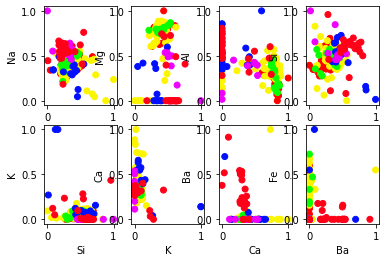

In [19]:
fig, axs = plt.subplots(2,4)
for i in range(data.shape[1]-1):
    axs[i // 4, i % 4].scatter(data[:,i],data[:,(i+1)],c=labels,cmap='hsv')
    axs[i // 4, i % 4].set_xlabel(var_names[i])
    axs[i // 4, i % 4].set_ylabel(var_names[i+1])

## Загрузка данных

In [20]:
pca = PCA(n_components = 2)
pca_data = pca.fit(data).transform(data)
pd.DataFrame(pca_data, columns=["component 1", "component 2"])

,component 1,component 2
0,-0.402106,0.032707
1,-0.206320,-0.144705
2,-0.188617,-0.194854
3,-0.237208,-0.097064
4,-0.223972,-0.121779
...,...,...
209,0.749082,-0.233155
210,0.732719,-0.225962
211,0.739477,-0.141512
212,0.723704,-0.228558


In [21]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.45429569 0.17990097]
[5.1049308  3.21245688]


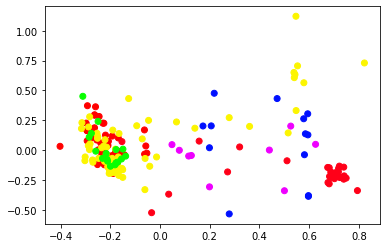

In [24]:
plt.scatter(pca_data[:,0], pca_data[:,1], c=labels, cmap='hsv')
None